### Single Decision Tree

In [7]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import utils

covertype = fetch_ucirepo(id=31) 
  
X = covertype.data.features 
y = covertype.data.targets 
  

In [8]:
# preprocess data using utils.py -- standardize data
X_clean, y_clean = utils.clean_data(X, y)

X_train, X_test, y_train, y_test =  utils.split_data(X_clean, y_clean)
X_test

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
215988,2767,66,17,210,18,1190,234,204,96,2251,...,0,0,0,0,0,0,0,0,1,0
424155,2724,160,19,60,4,1350,236,240,127,2514,...,0,0,0,0,0,0,0,0,1,0
274437,2360,65,7,127,21,1377,227,226,134,339,...,0,0,0,0,0,0,0,0,0,1
65944,2995,45,4,285,30,5125,221,231,146,5706,...,0,0,0,0,0,0,0,0,0,0
11015,2400,106,27,150,63,342,253,196,51,811,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565516,2935,75,17,342,63,3314,238,206,93,2271,...,0,0,0,0,0,0,0,0,1,0
343947,2768,235,20,210,20,1567,181,253,204,1339,...,0,0,0,0,0,0,0,0,1,0
80871,2922,252,8,313,22,5427,204,245,180,4729,...,0,0,0,0,0,0,0,0,0,0
169606,3144,31,6,124,5,5036,219,228,145,2781,...,0,0,0,0,0,0,0,0,0,0


# Decision tree with sklearn


In [9]:
tree = DecisionTreeClassifier(
    #criterion='gini',
    criterion='entropy',
    #max_depth=10,
    random_state=1234
)

In [10]:
tree.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1234
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [11]:
y_pred = tree.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.9440548006505857


# Visualization

['Aspen', 'Lodgepole Pine', 'Spruce/Fir', 'Krummholz', 'Ponderosa Pine', 'Douglas-fir', 'Cottonwood/Willow']


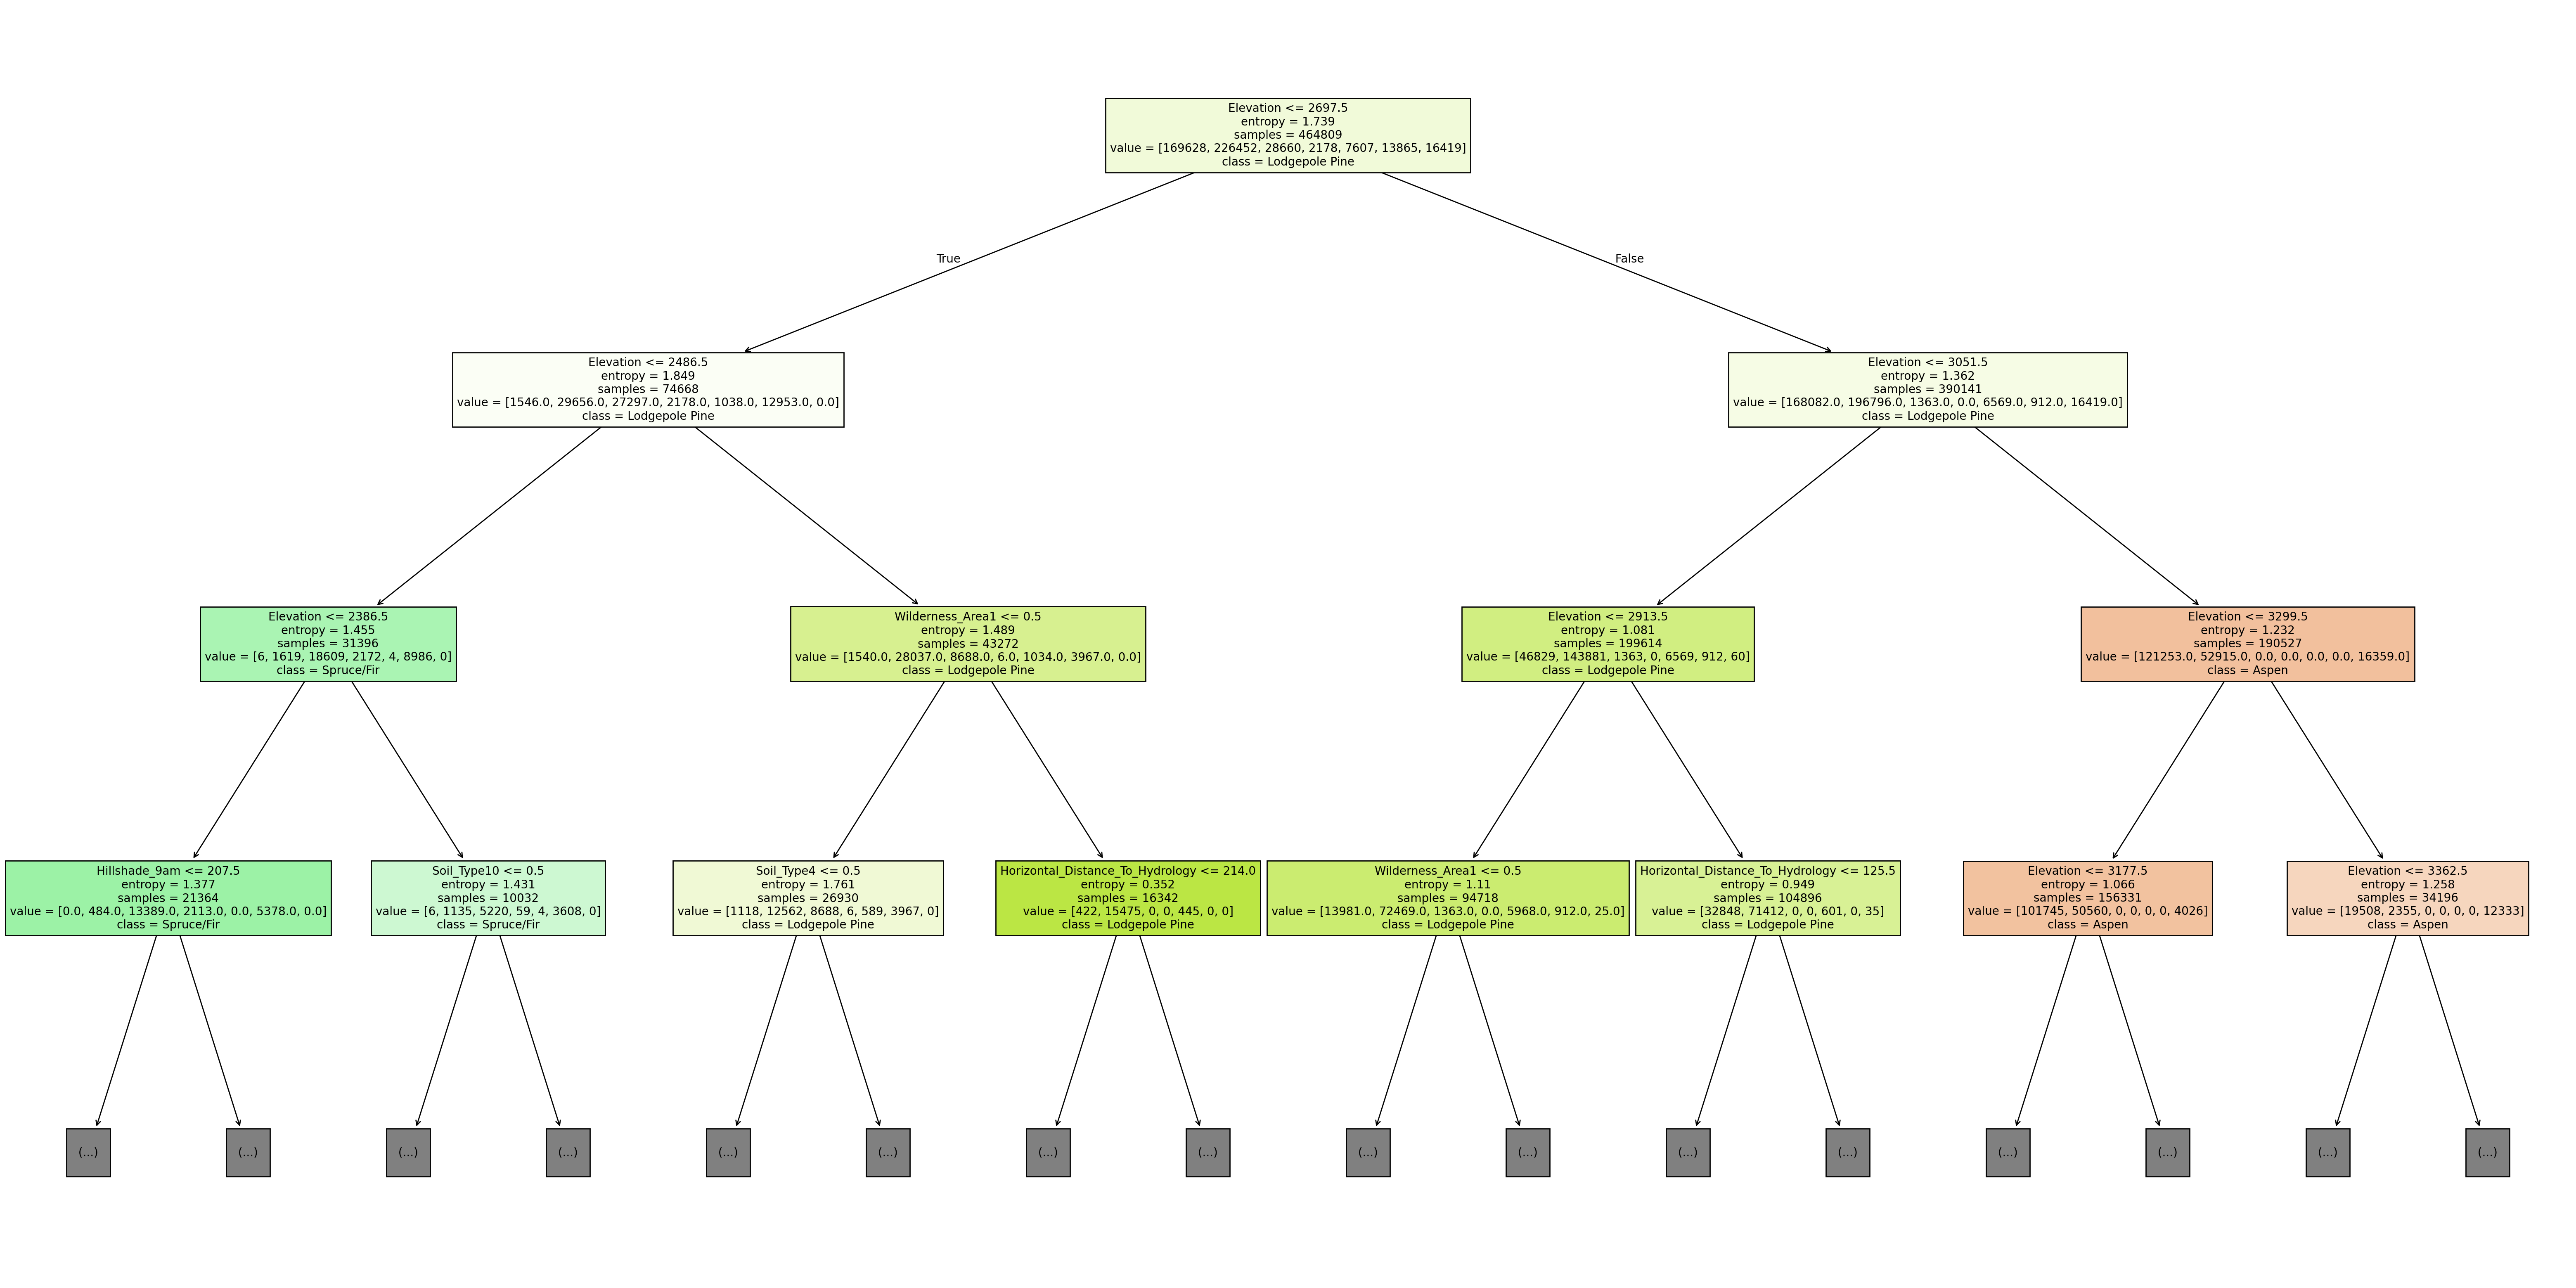

In [12]:


forest_names_map = {
    1: 'Spruce/Fir',
    2: 'Lodgepole Pine',
    3: 'Ponderosa Pine',
    4: 'Cottonwood/Willow',
    5: 'Aspen',
    6: 'Douglas-fir',
    7: 'Krummholz'
}

y_temp = y.squeeze()
y_named = y_temp.map(forest_names_map)
class_names = list(y_named.unique())

plt.figure(figsize=(40, 20), dpi=200) 

print(class_names)
plot_tree(
    tree,
    feature_names=X.columns,
    class_names=class_names,
    filled=True,
    max_depth=3,
    fontsize=10
)

plt.show()